# SI 670 Applied Machine Learning, Homework 1

Please export this notebook as html with file name `si670f25_hw1_youruniqname.html` when submitting on gradescope.

As a reminder, the work you submit must be your own work. Feel free to discuss general approaches to the homework with classmates: if you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.

**Your name:** Zhonghan Xie

**Your uniqname:** jonasxie


## Problem 1 (10 points)

In class, you learned how machine learning problems can broadly be categorized into three types: supervised, unsupervised and reinforcement learning.

Now, pick a domain or field (e.g. healthcare, finance, meteorology). Find an example problem of each of these types within your chosen domain, and argue why you think the problem corresponds to its claimed type.

**Your answer to problem 1 here:**

I choose the education policy domain. One important issue in K-12 education in United States is the high school dropout rate. I need more evidence to predict individual dropout rate in the future, so that we can design better intervention programs to help students stay in school. It is a supervised learning problem. We have a clear target variable. $Y$ here is the dropout rate, and $X$ is the potential features that we can put into the model, like family income, school quality. We train the model on historical data and predict $Y$ for new students.

## Problem 2 (10 points)

### (a)
Suppose that your manager wants you to predict whether the quality of products are low, medium, or high. Is this a regression task or a classification task? Why?

### (b)
Now suppose that the manager wants you to also predict what the number of products sold is going to be tomorrow. Is this a regression task or a classification task? Why?

**Your answer to problem 2 here:**

(a): It is a classification problem. The target variable, quality of products, is a categorical variable.

(b): It is a regression problem. The target variable, number of products sold, is a interval-ratio variable.

## Problem 3 (10 points)

### (a)
A policy analyst wants to forecast how many small businesses in New York City will remain open in the next five years based on historical patterns of minimum wage levels and business data, without necessarily identifying whether the minimum wage directly causes these outcomes. Is this an example of Prediction or Inference?

### (b)
If you answered Prediction, write the Inference version of this problem. If you answered Inference, write the Prediction version of this problem.

**Your answer to problem 3 here:**

That is a prediction problem. Because we don't really care about the identification or the causal relationships. We want the accurate prediction number of the small business. If we phrase it as an inference problem, we can say it like: "Given the historical patterns of minimum wage levels and small business data in NYC, how does the minimum wage affect the small business in NYC?"

## Problem 4 (5 points)

Below are two plots corresponding to two k-NN classifiers run on the iris  dataset. Which one corresponds to `k=3`, and which one corresponds to `k=20`? Please provide your reasoning.

Figure 1
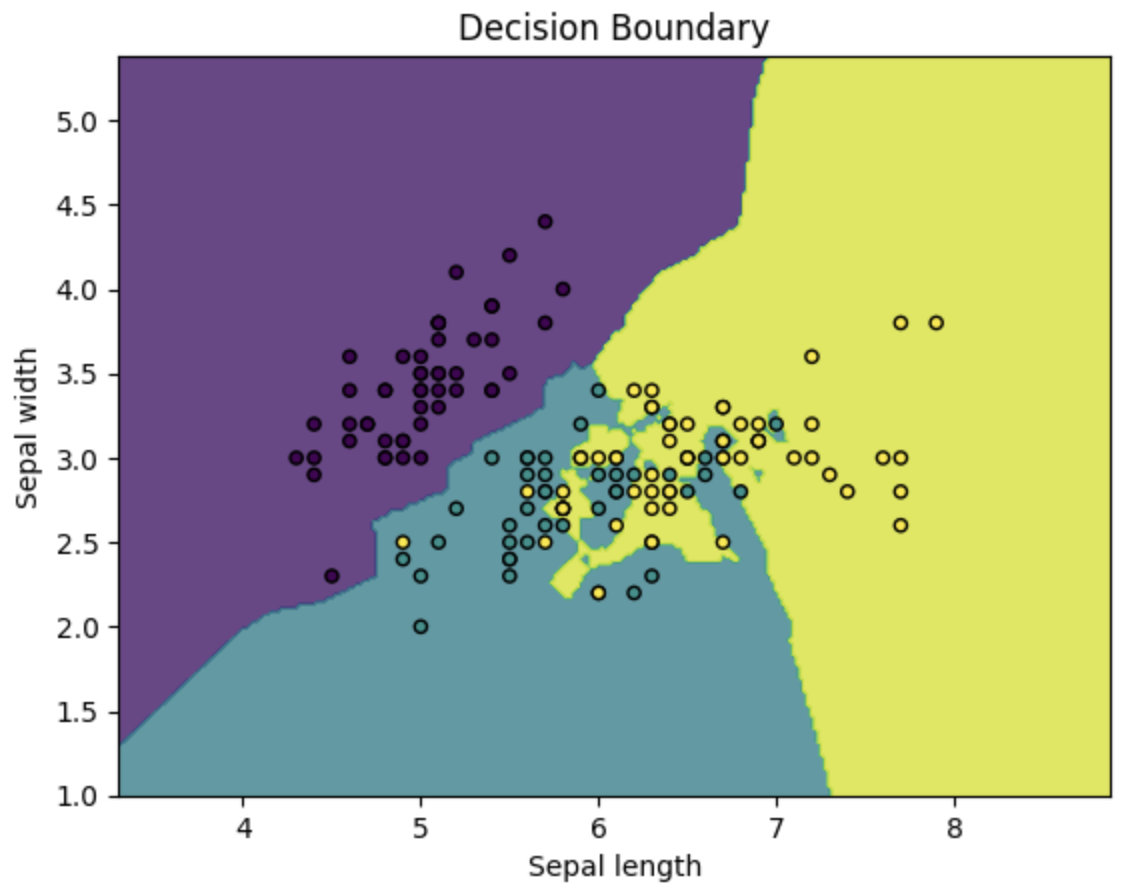

Figure 2

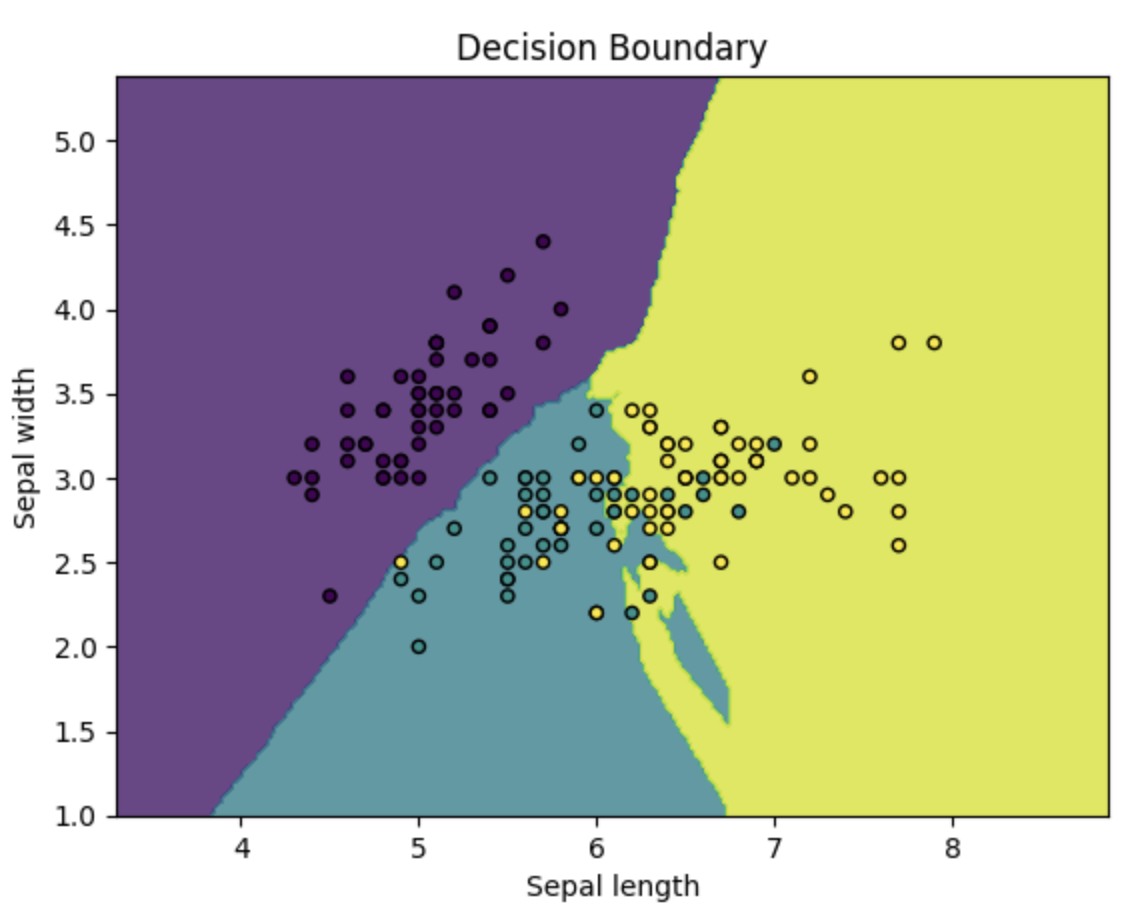

**Your answer to problem 4:**

The first graph is more likely the k=3 and the second graph is more likely the k=20 one. Because the boundary in the first graph is more jagged and complex than the second one. More local patterns are captured in the first graph which also means that the number of neighbors is smaller.

## Problem 5 (5 points)

Draw the decision boundary for 1-NN for the following points, and briefly explain your method of finding this boundary:

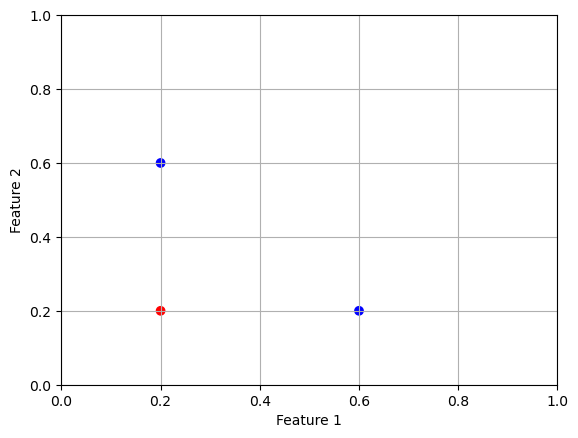

**Your answer to problem 5 here:**

I first compare the distances between each pair of red point and blue points. Then I draw the midline between each pair. The boundary is the intersection of the two midlines.

## Problem 6 (5 points)

Consider the points showed in the picture, where each axis represents a feature. Each point is labeled as either `red` or `blue`,

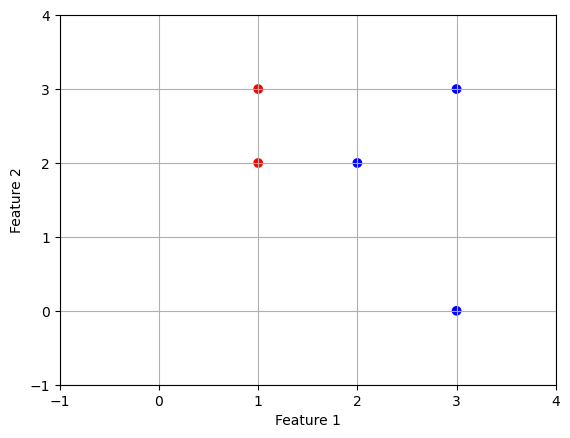

Decide what a 3-NN would classify each of the following four points as (`red` or `blue`).

1.   (1, 1)
2.   (1.5, 0.5)
3.   (1.5, 1.5)
4.   (2, 1)

**Your answer to Problem 6 here:**

1. red
2. blue
3. red
4. blue

## Problem 7 (25 points)

Suppose that we have two fixed normal distributions: A and B. We provide you with two functions for this problem:

*   `generate_dataset` generates a dataset of a given size comprising of 1D points labeled either positive or negative. It draws the positively labeled points from distribution A and the negatively labeled points from distribution B every time it is called.
*   `plot_accuracy_against_draws` takes a list of accuracies and produces a scatter plot.

We want you to do the following:
*   Use `generate_dataset` to generate 10 different datasets, each of size 50
*   For each dataset,
    *   Split it into train-test with 80% training and 20% test (do not set random state to 0)
    *   Fit a 5-NN classifier to the training data
    *   Compute accuracy on the test data
    *   Repeat these three steps 50 times and take the mean test accuracy over all 50 train-test splits
    *   Save the mean test accuracy to an array
*   Use the `plot_accuracy_against_draws` function on this array to plot the different mean test accuracies for different datasets.

Judging from the plot, do you have different mean test accuracies for different datasets generated from the same two distributions? Why do you think this is happening?

*(Note: Feel free to import any functions/libraries you need for this problem!)*

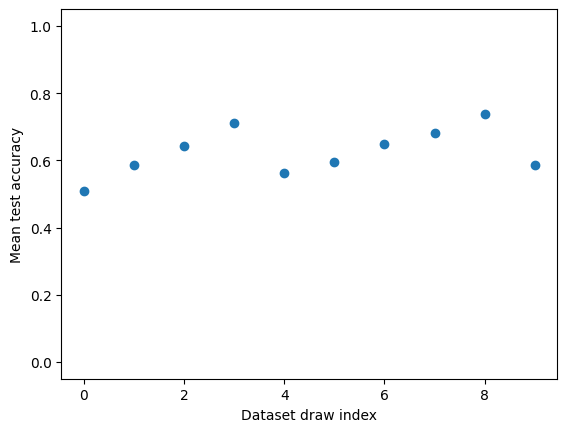

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def generate_dataset(size = 50):
    positive_points = np.random.normal(10, 10, size//2) # So distribution A is N(10, 10)
    negative_points = np.random.normal(20, 10, size - size//2) # So distribution B is N(20, 10)

    X = np.concatenate([positive_points, negative_points]).reshape(-1, 1)
    Y = np.array([1] * (size//2) + [-1] * (size - size//2))

    return X, Y

def plot_accuracy_against_draws(accuracies):
    x_vals = list(range(len(accuracies)))
    plt.scatter(x_vals, accuracies)
    plt.ylim(-0.05, 1.05)
    plt.xlabel('Dataset draw index')
    plt.ylabel('Mean test accuracy')
    plt.show()

### Your code here
datasets = [generate_dataset() for _ in range(10)]
mean_accuracies = []
for dataset in datasets:
    X, y = dataset
    accuracies = []
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = KNeighborsClassifier(n_neighbors=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    mean_accuracies.append(np.mean(accuracies))

plot_accuracy_against_draws(mean_accuracies)



**Your text answer to problem 7 here:**

The reason why we see different mean test accuracies based on same two underlying distributions is that our sample is randomly selected. Those samples are different and may not be representative of the full underlying distribution. I think that it is especially true when the sample size is not large enough (only 50 in this case). Also, K-NN is more sensitive to those local patterns in different random subsets, capturing more variance in the data.

## Problem 8 (10 points)

Suppose that you are trying to predict the success of NFL teams using machine learning from a variety of stats about their players. Some of these stats include:

*   40-yard dash time
*   Shuttle run time
*   Bench press
*   Broad jump
*   Vertical jump

Do you need to normalize your features in this case? Why or why not? Provide reasoning behind your answer.

**Your answer to problem 8 here**




Yes, we need to normalize these features. Because these features are using totally different scales. Using the raw data will lead to biased weights in our model. It is especially true for algorithms like k-NN which use distance metrics.

## Problem 9 (20 points)

The following code is a toy example of breast cancer detection, where we run a simple 5-NN classifier on the breast cancer dataset available on `scikit-learn`.

Using techniques discussed in the class so far, please modify this code in order to improve the performance. Briefly explain your reasoning.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Test accuracy is:', knn.score(X_test_scaled, y_test))

Test accuracy is: 0.951048951048951


In [ ]:
# not sure how I can improve the accuracy further just using the course content so far. I will try random forest model from my experience.

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_scaled, y_train)
print('Test accuracy with random forest is:', rf.score(X_test_scaled, y_test))

Test accuracy with random forest is: 0.972027972027972


**Your text answer to problem 9 here:**

## Problem 10 (20 points)

The code below generates data from two distributions, one for the positive class and one for the negative class. It then fits both a 5-NN classifier and a majority-class baseline to the data. For each data point, the majority-class baseline ignores the features and simply uses the majority class (positive in our case) as its prediction. The figure generated by the code shows how the accuracy from these two methods changes as the proportion of positive samples increases.

### (a)
Why is our 5-NN model beating the majority-class baseline when the positive and negative classes are roughly balanced?

### (b)
Why is the majority-class baseline beating the 5-NN model when the classes are highly imbalanced?

### (c)
Is the baseline preferable to KNN? Are there considerations we should make when using the plot below to compare KNN to the majority-class baseline?

In [ ]:
from collections import Counter
#sample from a couple
def generate_dataset(sample_frac, size = 50):
    n_pos = int(size*sample_frac)
    n_neg = size - n_pos

    positive_points = np.random.normal(10, 20, n_pos) # So distribution A is N(10, 10)
    negative_points = np.random.normal(15, 20, n_neg) # So distribution B is N(20, 10)

    X = np.concatenate([positive_points, negative_points]).reshape(-1, 1)
    Y = np.array([1] * n_pos + [-1] * n_neg)

    return X, Y


knn_accs = []
maj_accs = []
SIZE=500
samp_fracs = np.arange(.5, 1, .05)
for samp_frac in samp_fracs:

    X, y = generate_dataset(samp_frac, size=SIZE)

    #fit KNN
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X, y)
    knn_acc = knn.score(X, y)


    #baseline: majority class
    baseline = Counter(y).most_common()[0][0]
    baseline = np.array([1]*(SIZE))
    majority_acc = knn.score(X, baseline)

    knn_accs.append(knn_acc)
    maj_accs.append(majority_acc)

fig, ax = plt.subplots(figsize=(8, 6.5))
ax.plot(samp_fracs, knn_accs, label="KNN")
ax.plot(samp_fracs, maj_accs, label="Majority Label")
fig.suptitle("KNN versus Majority Class", size=20)
ax.set_xlabel("Fraction of Data Points with Postive Label", size=14)
ax.set_ylabel("Accuracy", size=14)
plt.legend()


**Your text answer to problem 10 here:**




## Disclosure

**If you used ChatGPT for any of the questions above, please disclose which questions you used it for, and how you used it.**

**Disclosure here:**